In [114]:
import numpy as np
import matplotlib.pyplot as plt 

# effective potential 
- V(r) = Z/r * psi where r = u*x
- u* = 1/4 * ((9 * pi^2)/2Z)^(1/3) (N/N-1)^2/3 a0
- a0 = hbar^2/me^2

# density 
- rho(x) = Z/4piu*3 (N/N-1) (psi(x)/x)^(3/2)

In [283]:
# constants 
Z = 2 # nuclear charge
e = -1.60217662E-19 # electric charge [C]
Ne = 2 # active electrons 
hbar = 1.0545718E-34 # reduced plank's constant [J*s]
m_e = 9.10938356E-31 # mass of electron [kg]
a0 = hbar**2 / (m_e * e**2) # bohr radius 
a = 37/65 
A = 29.7123
B = 226.2770
l = 1 # orbital angular momentum

In [284]:
# mu*
first = (9 * np.pi**2) / (2 / Z) # first term in ustar
second = Ne / (Ne - 1) # second term in ustar
ustar = 1/4 * first**(1/3) * second** (2/3) * a0 

In [285]:
q = (Z - Ne) / Z

if q < 0.0325:
    gamma0 = -3/2 * (1 - np.sqrt(1 + (20/(9 * (q + 1/Z)))))
else:
    gamma0 = a * (A - np.sqrt(A**2 + B * np.log(q + 1/Z)))


In [286]:
# Screening function, psi(x)
x0 = gamma0 / a # ionic atomic radius 
r0 = x0 * ustar #/ 5.29E-11  m to a0
r = np.linspace(0,r0,num=200) # ionic atomic radius 
x = r / ustar 
psi_1 = (1 / (1 + a * x)**2)
psi_2 = 1 - ((1 + a * x) / (1 + gamma0))**5
psix = psi_1 * psi_2
r0

2.958863459043291

In [287]:
# effective Coluomb potential, V(r)
def potential(r, psix):
    return ((Z * e) / r) * psix


/var/folders/w3/12dc4l3n14zb17mtwby_trbc0000gp/T/ipykernel_32702/1549966731.py:3: RuntimeWarning: divide by zero encountered in divide
  return ((Z * e) / r) * psix


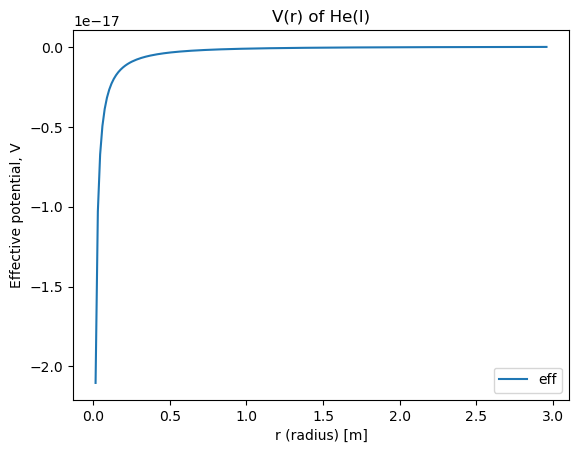

In [288]:
# plot V(r)
V = potential(r, psix)
plt.xlabel('r (radius) [m]')
plt.ylabel('Effective potential, V')
plt.title('V(r) of He(I)')
# plt.plot(r, V, label = 'eff')
plt.plot(r, V, label = 'eff')
plt.legend()
plt.show()

In [121]:
# density calc
rho = (Z / (4 * np.pi * ustar * 3)) * (Ne / (Ne - 1)) * (psix / x)**(3/2)

/var/folders/w3/12dc4l3n14zb17mtwby_trbc0000gp/T/ipykernel_32702/915886136.py:2: RuntimeWarning: divide by zero encountered in divide
  rho = (Z / (4 * np.pi * ustar * 3)) * (Ne / (Ne - 1)) * (psix / x)**(3/2)


/var/folders/w3/12dc4l3n14zb17mtwby_trbc0000gp/T/ipykernel_32702/1521999326.py:5: RuntimeWarning: invalid value encountered in multiply
  plt.plot(x, rho*x**2)


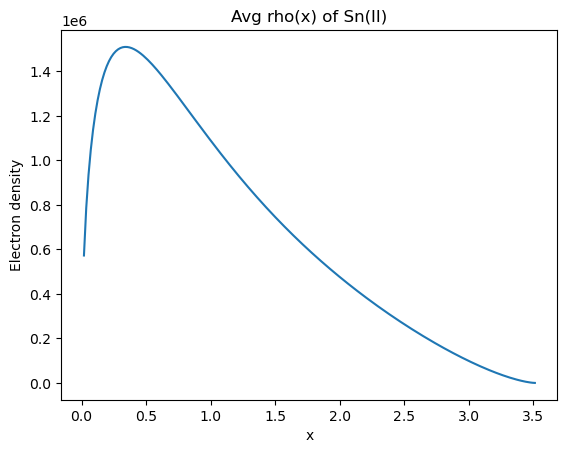

In [122]:
# plot rho(x)
plt.xlabel('x')
plt.ylabel('Electron density')
plt.title('Avg rho(x) of Sn(II)')
plt.plot(x, rho*x**2)
plt.show()
